# CNN (Convolutional Neural Network)

### 1, Padding and Stride

$$
OH = \frac{W + 2P - FH}{S} + 1 \\
OW = \frac{W + 2P - FW}{S} + 1
$$

Example
- input size: (4, 4) padding: 1, stride: 1 filter size(3, 3)
$$
OH = \frac{4 + 2*1 -3}{1} + 1 = 4 \\
OW = \frac{4 + 2*1 - 3}{1} + 1 = 4
$$

- input size: (7, 7) padding: 0 stride: 2, filter size: (3, 3)

$$
OH = \frac{7 + 2*0 -3}{2} + 1 = 3 \\
OW = \frac{7 + 2*0 -3}{2} + 1 = 3
$$

- input size: (28, 31), padding: 2, stride: 3, filter size: (5, 5)

$$
OH = \frac{28 + 2*2 - 5}{3} + 1 = 10 \\
OW = \frac{31 + 2*2 - 5}{3} + 1 = 11
$$

In [3]:
import numpy as np
x = np.random.rand(10, 1, 28, 28)
x.shape

(10, 1, 28, 28)

In [5]:
x[0].shape
x[1].shape

(1, 28, 28)

In [ ]:
x[0, 0]

### 2, Execute convolution layer

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from shared_code.util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)


### 3, Train MNIST data

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from chapter3.dataset.mnist import load_mnist
from shared_code.simpleConvNet import SimpleConvNet
from shared_code.trainer import Trainer

In [ ]:
# read data
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

max_epochs = 20

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size':5, 'pad':0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.01},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# save parameter
network.save_params("params.pkl")
print("Saved Network Parameters!")

# drow graph
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 4, Visualize first layer

In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from shared_code.simpleConvNet import SimpleConvNet

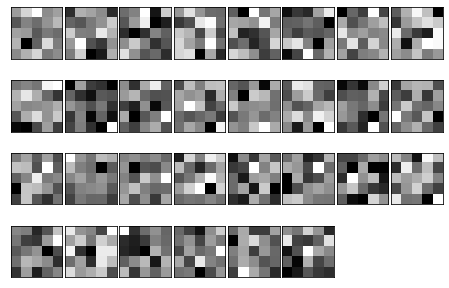

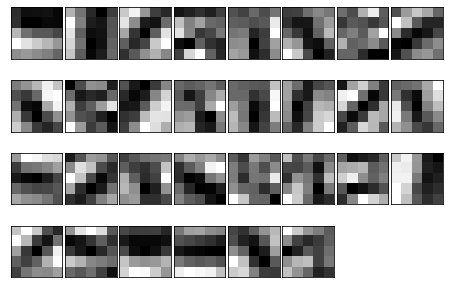

In [5]:
def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

network = SimpleConvNet()

# Weight before learning
filter_show(network.params['W1'])

# Weight after learning
network.load_params("params.pkl")
filter_show(network.params['W1'])